<img src="images/TilePyramid.jpg" width=500 alt="Tile Pyramid"></img>

Image from [Web Map Tile Services for Spatial Data Infrastructures: Management and Optimization](https://www.intechopen.com/chapters/38302)

# Web Map Services

Web map services (WMS) provide small, pre-rendered image tiles that collectively form a larger map when displayed in a grid-like pattern. Each tile represents a specific geographic area and zoom level, allowing users to view maps at different scales and locations.

## Tile Specifications

Various specifications govern the functionality of web map services, including TMS (Tile Map Service), WMTS (Web Map Tile Service), and XYZ. These specifications define how the tiles are organized, accessed, and displayed within a web mapping context.

However, it is not necessary to delve into the technical details of these underlying specifications in order to benefit from web map services. The implementation takes care of these intricacies behind the scenes, allowing users to seamlessly utilize the service without requiring in-depth knowledge.

Nonetheless, it is useful to have an understanding of the format that each specification follows. Here are examples of URL patterns associated with each specification:

TMS (Tile Map Service): http://example.com/tiles/{z}/{x}/{y}.png
WMTS (Web Map Tile Service): http://example.com/wmts/{Layer}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}.png
XYZ: http://example.com/{z}/{x}/{y}.png

These URLs represent the structure for accessing individual map tiles based on their zoom level (z), column (x), and row (y) coordinates, and sometimes, as you'll see later, it's based on the bounds `{XMIN},{XMAX},{YMIN},{YMAX}`. Other specifications exist as well, such as Quadkey used by Bing Maps and GeoPackage for storing tiles in a single file.

## Online WMS Viewers

Online WMS viewers provide a user-friendly interface for accessing and visualizing geospatial data through web map services. They offer a convenient way to explore and interact with various layers of information, ranging from weather data to satellite imagery.

Here are some examples of online WMS viewers:

NOAA Weather Viewer (https://viewer.weather.noaa.gov/): This viewer, provided by the National Oceanic and Atmospheric Administration (NOAA), allows users to access and visualize real-time weather information, including radar data, forecasts, and satellite imagery. It offers an intuitive interface for exploring weather conditions and monitoring meteorological phenomena.

National Map Viewer (https://apps.nationalmap.gov/viewer/): The National Map Viewer, developed by the United States Geological Survey (USGS), provides access to a wide range of geospatial data, including topographic maps, aerial imagery, and elevation data. Users can explore and overlay different datasets, enabling them to analyze and visualize various geographic features.

NASA Worldview (https://worldview.earthdata.nasa.gov/): NASA Worldview is a powerful online WMS viewer that offers access to a vast collection of satellite imagery and Earth observation data. Users can view imagery captured by different satellite missions and explore global environmental changes over time. The viewer supports advanced visualization and analysis tools, allowing users to study phenomena such as atmospheric conditions, land cover changes, and natural disasters.

While there are existing online WMS viewers that provide access to a wide range of geospatial data, **the true power of web map services (WMS) lies in the ability to overlay them with your own data.**

We will explore how to do this below.

## Prerequisites

The following packages are good to know, but not required, as we will be walking through them below.

| Concepts | Importance | Notes |
| --| --| --- |
| [Intro to GeoViews](https://geoviews.org/) | Helpful | Geographic visualizations |
| [Intro to Panel](https://panel.holoviz.org/) | Helpful | Dashboard creations |
| [Intro to Requests](https://requests.readthedocs.io/en/latest/) | Helpful | Accessing webpages |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Map projections |
| [Intro to OWSLib](https://owslib.readthedocs.io/en/latest/usage.html) | Helpful | Building WMS URLs |

- **Time to learn**: 15 minutes

---

## Imports

Let’s first import a few packages.

GeoViews is a Python library that facilitates the integration of WMS and other geospatial data sources with your own datasets. It provides a high-level interface for working with geographic data and simplifies the process of creating interactive visualizations.

CartoPy is a Python library that specializes in handling map projections and geospatial data visualization. It provides a wide range of tools and functionalities to work with geospatial datasets, making it easier to create maps with different projections.

Panel is a Python library that offers a set of flexible and powerful tools for creating interactive dashboards and apps. It allows you to build custom user interfaces with interactive controls, widgets, and layout components, enabling rich interactivity for your visualizations and data analysis workflows.

Requests is a popular Python library for making HTTP requests. It simplifies sending HTTP requests to web servers and handling the responses. In the context of geospatial data visualization, requests can be used to retrieve data from web services, such as WMS endpoints, to integrate external data sources into your visualizations.

OWSLib is a Python library designed for client-side programming using the interface standards of the Open Geospatial Consortium (OGC) web services and their associated content models. Specifically, in this scenario, OWSLib will be utilized solely for the purpose of constructing URLs for WMS.

The next line, `gv.extension("bokeh")`, enables the Bokeh (interactive) plotting backend for GeoViews. GeoViews supports multiple plotting backends, such as Bokeh and Matplotlib, which allow you to choose the one that best suits your needs.

Finally, `pn.extension()` initializes the panel library and sets up the necessary environment for creating interactive panels and dashboards. You may specify configurations like `sizing_mode="stretch_width"` within `pn.extension()`.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
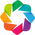

In [45]:
import geoviews as gv
import cartopy.crs as ccrs
import panel as pn
import requests
from owslib.wms import WebMapService

gv.extension("bokeh")
pn.extension()

## Using Built-in Sources

Here's how to use GeoViews to access built-in WMS tile sources effortlessly.

By activating the "pan" and "wheel_zoom" tools, users gain interactive control over the map. They can easily navigate the map by dragging, exploring different areas, and experiencing a sense of flexibility and control.

To experience the capabilities of WMS and GeoViews, try zooming in on the map. As you zoom in, you will notice that more details and finer features become visible, providing a richer and more detailed representation of the geographic data.

To see all available built-in tile sources, please visit the [GeoViews documentation](https://geoviews.org/gallery/bokeh/tile_sources.html).

In [46]:
basemap = gv.tile_sources.OSM().opts(active_tools=["pan", "wheel_zoom"])
basemap

:WMTS   [Longitude,Latitude]

## Overlaying Custom Data

By integrating WMS layers with your own data, you can unlock the potential of geospatial information and create maps that communicate intricate spatial relationships, highlight patterns and trends, and offer valuable insights.

Let's illustrate this with an example. In isolation, the coordinates (40.1N, -88.26W) may not hold much significance. However, when overlaying the WMS tiles and zooming in, you might discover that these coordinates correspond to the location of the University of Illinois at Urbana-Champaign, the author's alma mater. This simple overlay demonstrates how WMS layers can provide context and meaningful information to otherwise isolated data points.

Note that `crs` and `projection` were specified.

The `crs=ccrs.PlateCarree()` argument specifies that the data coordinates are **from** the Plate Carree coordinate reference system, which is commonly used for latitude and longitude values.

On the other hand, the `projection` parameter determines what the data should be transformed **to** before being displayed.

**At the time of writing, GeoViews only supports overlaying data with tile sources when the map's projection is set to `ccrs.GOOGLE_MERCATOR`.**

Lastly, the global_extent=True option ensures that the map displays the entire world.

In [47]:
coord_point = gv.Points((-88.24, 40.1), crs=ccrs.PlateCarree()).opts(projection=ccrs.GOOGLE_MERCATOR, global_extent=True)

basemap * coord_point

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

## Accessing External Sources

Although the availability of built-in sources is convenient, it may not always be sufficient for all use cases. However, the good news is that there are numerous external sources available, such as NOAA, which can be easily accessed, and depending on the source, free of charge!

For example, if you want to access radar base reflectivity provided by NOAA, you can create a `gv.WMTS` element with the appropriate URL and parameters specific to the external tile service.

In [48]:
radar_url_template = """
https://mapservices.weather.noaa.gov:443/eventdriven/services/
radar/radar_base_reflectivity_time/ImageServer/WMSServer?
service=WMS&version=1.1.1&request=GetMap&
layers=0&
styles=default&
width=256&height=256&
srs=EPSG%3A3857&
bbox={XMIN}%2C{YMIN}%2C{XMAX}%2C{YMAX}&
format=image%2Fpng&transparent=TRUE&
exceptions=application%2Fvnd.ogc.se_xml&bgcolor=0xFFFFFF
"""

radar_imagery = gv.WMTS(radar_url_template, crs=ccrs.GOOGLE_MERCATOR).opts(projection=ccrs.GOOGLE_MERCATOR, global_extent=True)

basemap * radar_imagery

:Overlay
   .WMTS.I  :WMTS   [Longitude,Latitude]
   .WMTS.II :WMTS   [Longitude,Latitude]

## Understanding the URL Template

The provided URL template is used to construct a request for a specific map image using WMS protocol.

Let's break down the components of the URL to understand its functionality:

1. `https://mapservices.weather.noaa.gov:443/eventdriven/services/`
   This is the base URL for the NOAA weather map services. It specifies the server address and port.

1. `radar/radar_base_reflectivity_time/ImageServer/WMSServer?`
   This part of the URL specifies the specific service and resource being accessed. In this case, it indicates the radar_base_reflectivity_time image service within the radar category.

2. `service=WMS&version=1.1.1&request=GetMap`
   These parameters define the service type (WMS) and the version of the WMS protocol being used (1.1.1). It also specifies that the request is to retrieve a map image (GetMap).

3. `layers=0`
   This parameter indicates the layer or layers from which the map image should be retrieved. In this case, it specifies layer 0.

4. `styles=default`
   This parameter specifies the style to be applied to the map image. Here, it is set to the default style.

5. `width=256&height=256`
   These parameters define the width and height (in pixels) of the requested map image.

6. `srs=EPSG%3A3857`
   This parameter specifies the spatial reference system (SRS) for the map image. In this case, it uses the EPSG:3857 coordinate reference system.

7. `bbox={XMIN}%2C{YMIN}%2C{XMAX}%2C{YMAX}`
   This parameter specifies the bounding box for the requested map image. The values {XMIN}, {YMIN}, {XMAX}, and {YMAX} will be replaced with actual coordinate values. The values provided within the curly braces are percent-encoded.

8. `format=image%2Fpng&transparent=TRUE`
   These parameters define the desired image format (PNG) and specify that the image should have a transparent background.

9.  `exceptions=application%2Fvnd.ogc.se_xml&bgcolor=0xFFFFFF`
    These parameters define how exceptions should be reported (in XML format) and set the background color for the map image to white (#FFFFFF).

You might also be wondering what those percent-encoded characters, like `%2C`, mean.

Percent-encoding is a mechanism used to represent special and reserved characters in URLs by replacing them with a "%" symbol followed by their hexadecimal representation. It ensures safe transmission and proper interpretation of URLs containing characters with special meanings or non-ASCII characters.

To de-mystify the template URL a step further, we can simply use `requests.utils.unquote` and see:
- `%3A`: Represents the colon character (`:`)
- `%2C`: Represents the comma character (`,`)
- `%2F`: Represents the forward slash character (`/`)
- `%20`: Represents the space character

In [49]:
requests.utils.unquote(radar_url_template).strip()

'https://mapservices.weather.noaa.gov:443/eventdriven/services/\nradar/radar_base_reflectivity_time/ImageServer/WMSServer?\nservice=WMS&version=1.1.1&request=GetMap&\nlayers=0&\nstyles=default&\nwidth=256&height=256&\nsrs=EPSG:3857&\nbbox={XMIN},{YMIN},{XMAX},{YMAX}&\nformat=image/png&transparent=TRUE&\nexceptions=application/vnd.ogc.se_xml&bgcolor=0xFFFFFF'

## Deriving the URL Template

Once you have understood the individual components of the URL template, you may wonder if you have to manually assemble them yourself. Fortunately, you can use OWSLib to programmatically construct the complete URL template.

To start, you need to locate the base URL and the specific resource manually by accessing the desired service and resource in your browser.

1. Open [weather.gov CloudGISWebServices](https://www.weather.gov/gis/cloudgiswebservices)
2. In the table, click [Base Reflectivity Radar](https://mapservices.weather.noaa.gov/eventdriven/rest/services/radar/radar_base_reflectivity/MapServer)
3. On the top left, click [WMS](https://mapservices.weather.noaa.gov/eventdriven/services/radar/radar_base_reflectivity/MapServer/WMSServer?request=GetCapabilities&service=WMS)
4. Copy and paste the browser URL into `get_wms_url` below.
5. Run this cell and the working URL should be generated.

In [81]:
# Global extent in EPSG:3857 (Google Mercator)
XMIN = -20037507.539400
YMIN = 1638517.444800
XMAX = 20037260.918700
YMAX = 7714669.394600


def get_wms_url(base_resource_url):
    wms = WebMapService(base_resource_url)
    wms_contents = wms.contents
    wms_layer = list(wms_contents)[0]
    wms_styles = list(wms[wms_layer].styles)
    wms_url = wms.getmap(
        layers=wms_layer,
        styles=wms_styles,
        srs="EPSG:3857",
        bbox=(XMIN, YMIN, XMAX, YMAX),
        size=(256, 256),
        format="image/png",
        transparent=True,
    ).geturl()
    return wms_url


radar_url = get_wms_url(
    "https://mapservices.weather.noaa.gov/eventdriven/services/radar/radar_base_reflectivity_time/ImageServer/WMSServer?request=GetCapabilities&service=WMS"
)
radar_url

'https://mapservices.weather.noaa.gov:443/eventdriven/services/radar/radar_base_reflectivity_time/ImageServer/WMSServer?service=WMS&version=1.1.1&request=GetMap&layers=0&styles=default&width=256&height=256&srs=EPSG%3A3857&bbox=-20037507.5394%2C1638517.4448%2C20037260.9187%2C7714669.3946&format=image%2Fpng&transparent=TRUE&exceptions=application%2Fvnd.ogc.se_xml&bgcolor=0xFFFFFF'

If you click on this URL, you should a tile like below!

In [82]:
pn.pane.Image(requests.get(radar_url).content, background="white")

/var/folders/8h/mk8mz7qn3_325ztm7pgb4ld00000gp/T/ipykernel_48754/248091421.py:1: PanelDeprecationWarning: "Image(..., background='white')" is deprecated and will be removed in version 1.1, use "Image(..., styles={'background': 'white'})" instead.
  pn.pane.Image(requests.get(radar_url).content, background="white")


BokehModel(combine_events=True, render_bundle={'docs_json': {'97c8ecbb-71b9-4159-a6fc-d5efc58804b2': {'version…

However, we're not done yet! If we simply pass this URL to `gv.WMTS` it will result in the following error:

```python
ValueError: Tile source URL format not recognized. Must contain {X}/{Y}/{Z}, {XMIN}/{XMAX}/{YMIN}/{YMAX} or {Q} template strings.
```

Therefore, we must replace the bounding box values with these template strings.

In [83]:
def formulate_url_template(url):
    return (
        url
        .replace(str(XMIN), "{XMIN}")
        .replace(str(YMIN), "{YMIN}")
        .replace(str(XMAX), "{XMAX}")
        .replace(str(YMAX), "{YMAX}")
    )

radar_url_template = formulate_url_template(radar_url)

radar_url_template

'https://mapservices.weather.noaa.gov:443/eventdriven/services/radar/radar_base_reflectivity_time/ImageServer/WMSServer?service=WMS&version=1.1.1&request=GetMap&layers=0&styles=default&width=256&height=256&srs=EPSG%3A3857&bbox={XMIN}%2C{YMIN}%2C{XMAX}%2C{YMAX}&format=image%2Fpng&transparent=TRUE&exceptions=application%2Fvnd.ogc.se_xml&bgcolor=0xFFFFFF'

Now, we can pass the URL template to gv.WMTS and get the same result as before.

In [84]:
gv.WMTS(radar_url_template)

:WMTS   [Longitude,Latitude]

## Troubleshooting URLs

If you encounter a blank page as a result, try formatting the URL template using the global `XMIN`, `YMIN`, `XMAX`, `YMAX` values in Mercator coordinates.

If it returns a white canvas, it probably means that there aren't any issues--there's simply no ongoing event, e.g. no precipitation for the radar to pick up on.

If you receive a detailed error message, that's good news--you can make the necessary revisions.

It is crucial to emphasize once more that at the time of writing, **`gv.WMTS` only works with the `ccrs.GOOGLE_MERCATOR` coordinate reference system/projection**!

## Getting Legends

A map loses its usefulness without a legend, unless the colors or symbols used are widely recognized.

As an example, let's retrieve the legend for the CPC 6-10 Days Outlook map and modify the `get_wms_url` function above!

We can, once again depend on `OWSLib` to retrieve the legend!

In [89]:
def get_wms_urls(base_resource_url):
    wms = WebMapService(base_resource_url)
    wms_contents = wms.contents
    wms_layer = list(wms_contents)[0]
    wms_styles = list(wms[wms_layer].styles)
    wms_url = wms.getmap(
        layers=wms_layer,
        styles=wms_styles,
        srs="EPSG:3857",
        bbox=(XMIN, YMIN, XMAX, YMAX),
        size=(256, 256),
        format="image/png",
        transparent=True,
    ).geturl()
    legend_url = wms_contents[wms_layer].styles[wms_styles[0]]["legend"]
    return {"wms": wms_url, "legend": legend_url}


cpc_outlook_wms_urls = get_wms_urls(
    "https://mapservices.weather.noaa.gov/vector/services/outlooks/cpc_6_10_day_outlk/MapServer/WMSServer?request=GetCapabilities&service=WMS"
)
cpc_outlook_wms_url_template = formulate_url_template(cpc_outlook_wms_urls["wms"])
cpc_outlook_legend_url = cpc_outlook_wms_urls["legend"]

cpc_outlook_imagery = gv.WMTS(cpc_outlook_wms_url_template).opts(global_extent=True)
cpc_outlook_legend_image = pn.pane.Image(requests.get(cpc_outlook_legend_url).content)

pn.Row(
    basemap * cpc_outlook_imagery,
    cpc_outlook_legend_image,
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'0eeb40c0-90fe-4686-8673-7153526f924d': {'version…

## Summary

Web map services (WMS) provide pre-rendered map tiles for displaying geospatial data.

They can be accessed through URLs based on specifications like TMS, WMTS, and XYZ. Online WMS viewers offer user-friendly interfaces for exploring geospatial data.

However, the true power of WMS lies in overlaying them with your own data. Packages like GeoViews, Panel, Requests, and Cartopy facilitate this integration.

For more examples of how to use WMS, check out the example workflows.

Next, we will explore how to use web feature services.